Exploratory Data Analysis - Shill Bidding Dataset

This script performs comprehensive EDA on the shill bidding dataset to understand:
1. Class distribution and skewness
2. Descriptive statistics on numeric variables
3. Distribution of categorical variables
4. Analysis separated by target class
5. Multicollinearity analysis for numeric variables

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Data loading

In [22]:
df = pd.read_csv('../data/Shill Bidding Dataset.csv', sep=',')

No missing data, from the dataset source (https://archive.ics.uci.edu/dataset/562/shill+bidding+dataset)

## Data exploration

In [23]:
# first 2 rows
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head(2))

Dataset shape: (6321, 13)

First few rows:
   Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732     _***i          0.20000            0.4   
1          2         732     g***r          0.02439            0.2   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  
0       0.000028       0.666667                 5      0  
1       0.013123       0.944444                 5      0  


**Numeric variables**: Bidder_Tendency, Bidding_Ratio, Successive_Outbidding, Last_Bidding, Auction_Bids, Starting_Price_Average, Early_Bidding, Winning_Ratio, Auction_Duration

**IDs**: Record_ID (num), Auction_ID (num), Bidder_ID (str)

**Categorical variables**: class (target)

In [10]:
numeric_vars = ['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 'Auction_Duration'] # Replace with your numeric column names

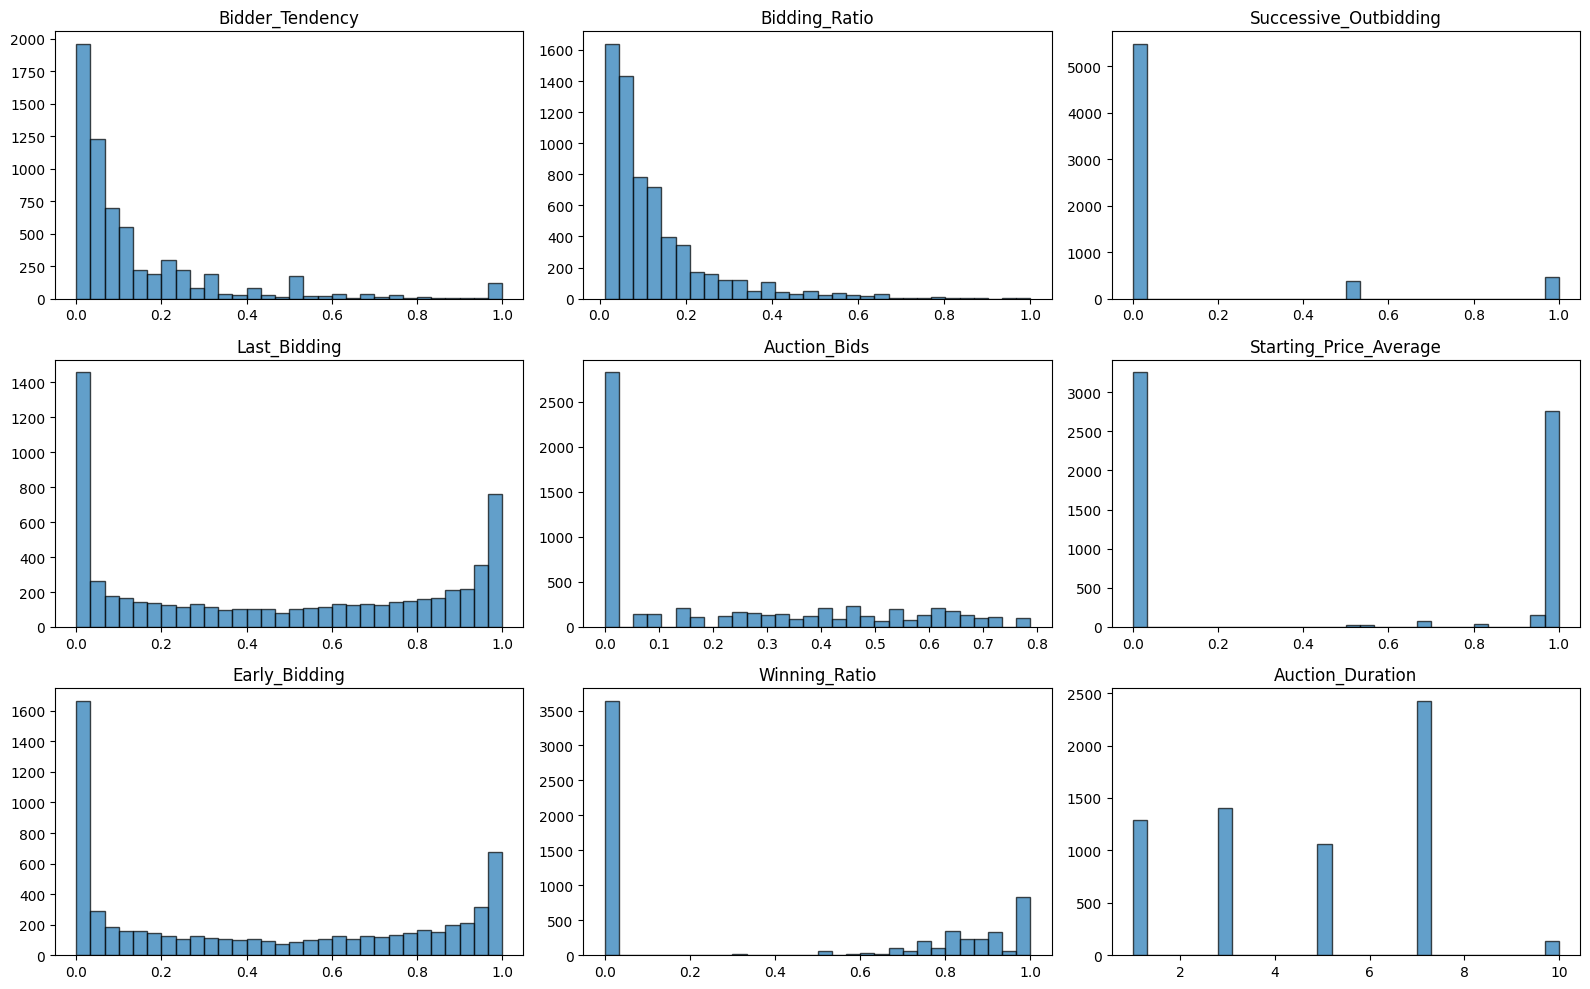

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Grid size
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))
axes = axes.flatten()  # so we can index as a flat list

for i, var in enumerate(numeric_vars):
    ax = axes[i]
    ax.hist(df[var], bins=30, alpha=0.7, edgecolor='black')
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide any unused axes
for j in range(len(numeric_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

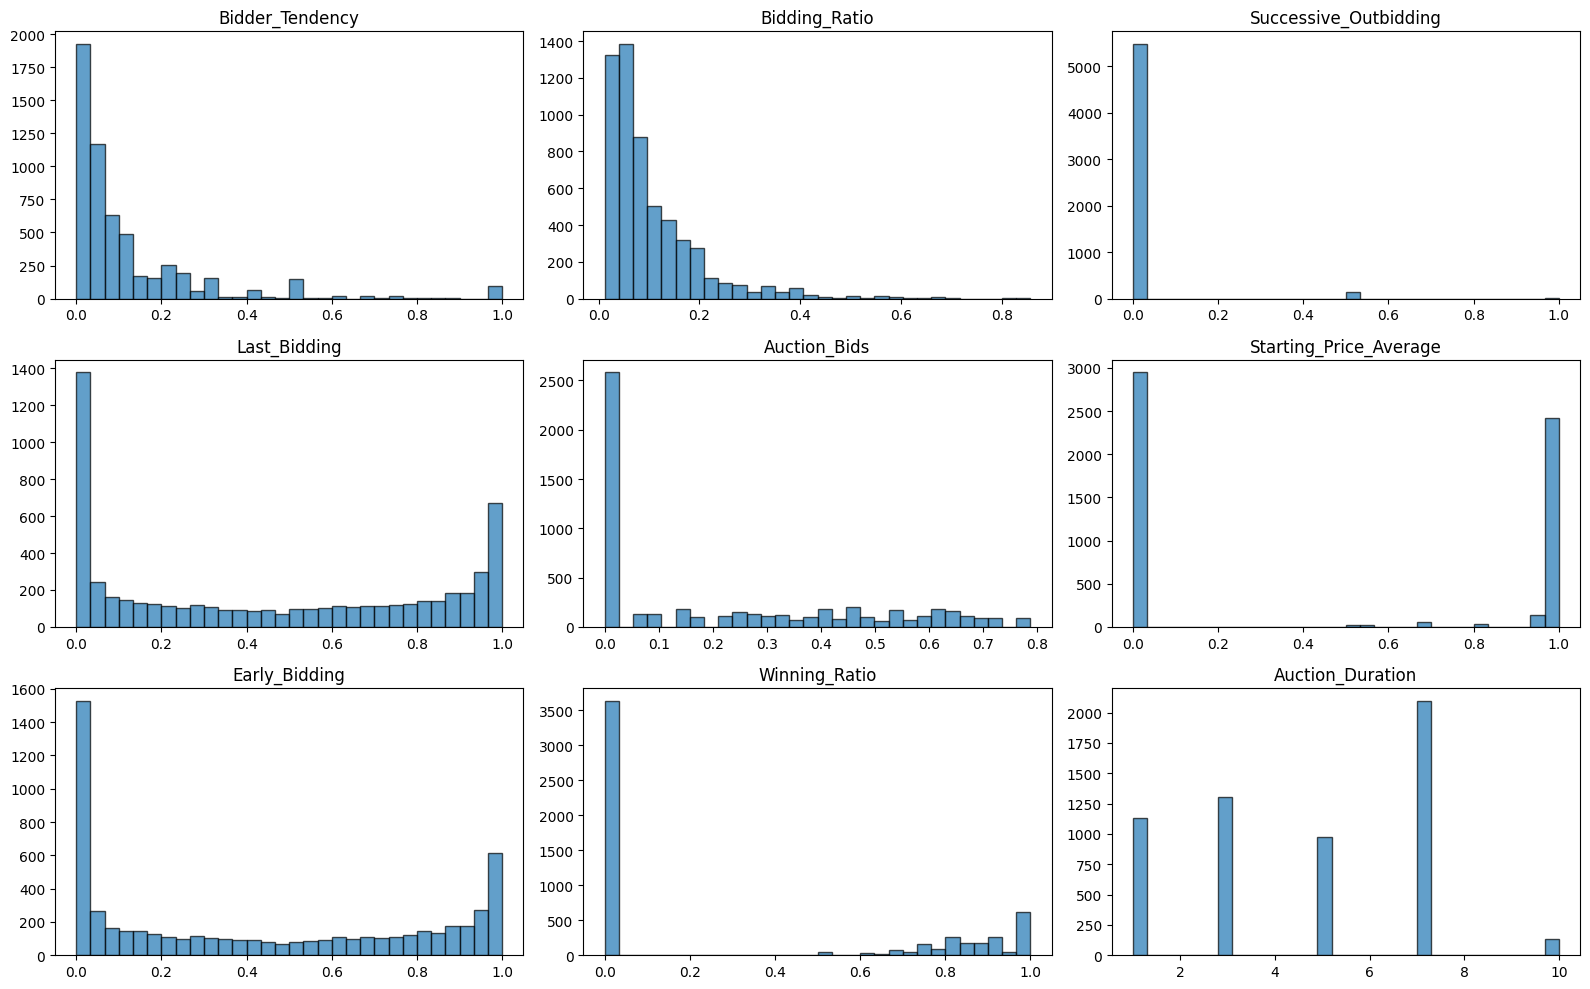

In [16]:
df_non_shill = df[df['Class'] == 0]
df_shill = df[df['Class'] == 1]

# Non-shill graphs
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))
axes = axes.flatten()  # so we can index as a flat list

for i, var in enumerate(numeric_vars):
    ax = axes[i]
    ax.hist(df_non_shill[var], bins=30, alpha=0.7, edgecolor='black')
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide any unused axes
for j in range(len(numeric_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

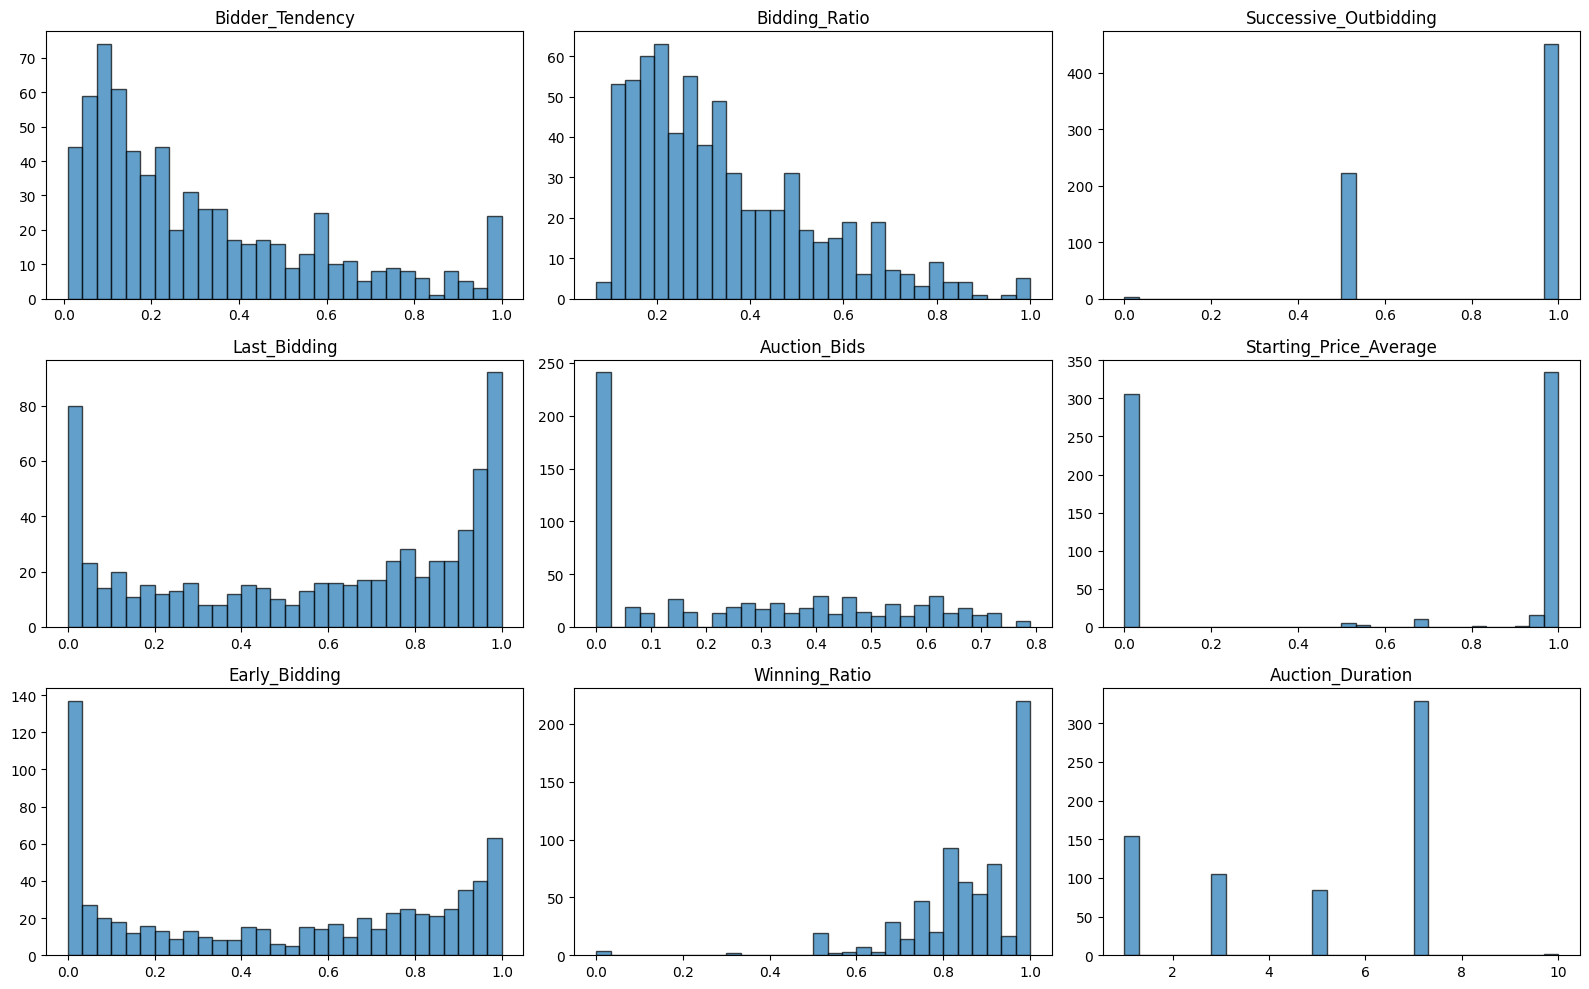

In [17]:
# Shill graphs
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))
axes = axes.flatten()  # so we can index as a flat list

for i, var in enumerate(numeric_vars):
    ax = axes[i]
    ax.hist(df_shill[var], bins=30, alpha=0.7, edgecolor='black')
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide any unused axes
for j in range(len(numeric_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

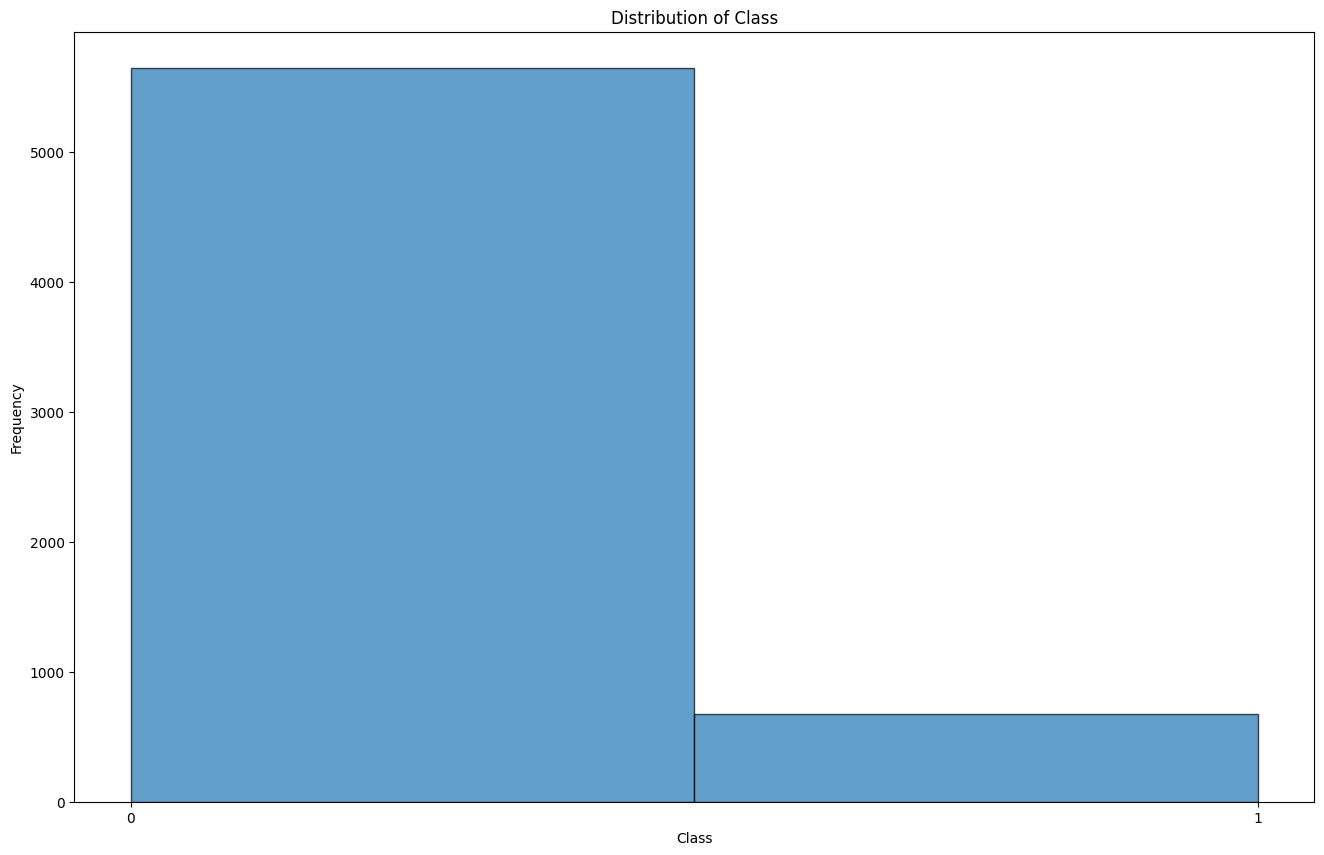

In [18]:
plt.figure(figsize=(16, 10))
plt.hist(df['Class'], bins=2, edgecolor='black', alpha=0.7)
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')
plt.show()

In [21]:
class_counts = df['Class'].value_counts()
ratio = class_counts[1] / class_counts[0]
print(f"Ratio of Class 1 to Class 0: {ratio:.4f}")

Ratio of Class 1 to Class 0: 0.1196
